# Fig-Contour Genereation

## Holomorphic extension
The first two figs aim to show the holomorphic extension of $f_{\beta}^{1/2}(x)$. 

In [1]:
# Load modules & Gen Data
import os 
import sys 
os.environ['CUDA_VISIBLE_DEVICES'] = '1' 
print(os.getcwd()) # print the current working directory
sys.path.append(os.path.join(os.getcwd(), '..','..')) # add the root directory to the path

from src import * # import everything from the src folder
import matplotlib.pyplot as plt 


real_lim = [-15, 15]
imag_lim = [-15, 15]
input = np.linspace(real_lim[0], real_lim[1], 1000) + 1j*np.linspace(imag_lim[0], imag_lim[1], 1000)[:, np.newaxis]
output = complex_log_one_plus_exp(input) 

/home/jovyan/project/MirrorDescent-DFT/figures/fig_gen_contour


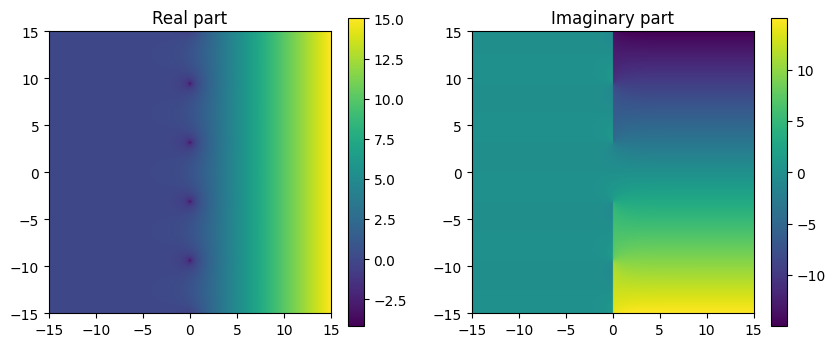

In [2]:
# Example figures 
plt.figure(figsize=(10,4), dpi=100)
plt.subplot(1,2,1)

plt.imshow(np.real(output), extent=(real_lim[0], real_lim[1], imag_lim[0], imag_lim[1]))
plt.title("Real part") 
plt.colorbar()

plt.subplot(1,2,2)

plt.imshow(np.imag(output), extent=(real_lim[0], real_lim[1], imag_lim[0], imag_lim[1]))
plt.title("Imaginary part")
plt.colorbar()
plt.show()

In [3]:
plt.figure(figsize=(6,5),dpi=300) 
plt.imshow(np.real(output), extent=(real_lim[0], real_lim[1], imag_lim[0], imag_lim[1]))
cbar = plt.colorbar()
# Fix: Colorbar doesn't have set_clim method, but the underlying mappable does
plt.clim(-15, 15)  # Set color limits on the current image
plt.savefig("./fig_holo_ext_real.pdf", format='pdf')
plt.savefig("./fig_holo_ext_real.eps", format='eps')
plt.close() 

plt.figure(figsize=(6,5),dpi=300) 
plt.imshow(np.imag(output), extent=(real_lim[0], real_lim[1], imag_lim[0], imag_lim[1]))
cbar = plt.colorbar()
# Fix: Colorbar doesn't have set_clim method, but the underlying mappable does
plt.clim(-15, 15) 
plt.savefig("./fig_holo_ext_imag.pdf", format='pdf')
plt.savefig('./fig_holo_ext_imag.eps', format='eps')
plt.close() 

# Poles generation 
We generate poles based on Lin's paper. We use those elliptic functions to generate poles and weights. 

In [4]:
# Load modules & Gen Data
import os 
import sys 

print(os.getcwd()) # print the current working directory
sys.path.append(os.path.join(os.getcwd(), '..','..')) # add the root directory to the path

from src import * # import everything from the src folder
import matplotlib.pyplot as plt 

E_m = -2  # minimal energy
E_M = 6 # maximal energy
beta = 1 # inverse temperature
N = 20 # number of points

xi, w = gen_contour(E_m, E_M, beta, N, function='fermi_dirac')

/home/jovyan/project/MirrorDescent-DFT/figures/fig_gen_contour


/home/jovyan/project/envs/jax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


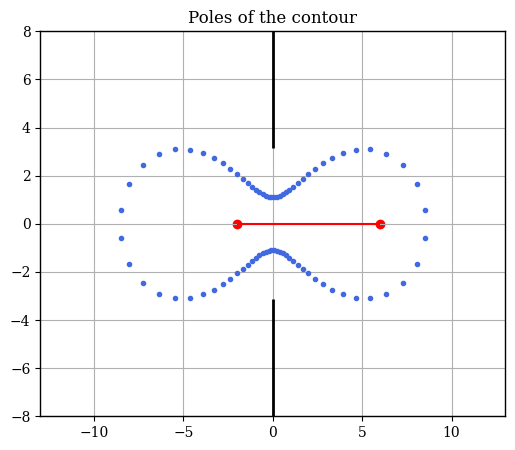

In [5]:
# figure 
from src.plots.plotter import *  

plt.figure(figsize=(6,5), dpi=100)
plt.plot(np.hstack([xi.real,xi.real]), np.hstack([xi.imag, - xi.imag]),'.',color='royalblue')
plt.hlines(y=0, xmin=E_m, xmax=E_M, colors='red')
plt.scatter([E_m, E_M], [0, 0], color='red')
plt.vlines(x=0, ymin=np.pi, ymax=10, colors='black', linewidth=2)
plt.vlines(x=0, ymin=-np.pi, ymax=-10, colors='black', linewidth=2) 
plt.title('Poles of the contour')
plt.grid(True)
plt.xlim([-13,13])
plt.ylim([-8,8])
plt.show()

In [67]:
plt.figure(figsize=(6,5), dpi=100)
plt.plot(np.hstack([xi.real,xi.real]), np.hstack([xi.imag, - xi.imag]),'.',color='royalblue')
plt.hlines(y=0, xmin=E_m, xmax=E_M, colors='red')
plt.scatter([E_m, E_M], [0, 0], color='red')
plt.vlines(x=0, ymin=np.pi, ymax=10, colors='black', linewidth=2)
plt.vlines(x=0, ymin=-np.pi, ymax=-10, colors='black', linewidth=2)
plt.grid(True)
plt.xlim([-13,13])
plt.ylim([-8,8])
plt.savefig("./fig_poles.pdf", format='pdf') 
plt.savefig("./fig_poles.eps", format='eps')
plt.close()

In [6]:

plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.titlesize': 16})

plt.figure(figsize=(18,4), dpi=300)
colors = ['firebrick','dodgerblue' ,'orange']
plt.subplot(1,3,1)
plt.imshow(np.real(output), extent=(real_lim[0], real_lim[1], imag_lim[0], imag_lim[1]), aspect='auto')
plt.xlim([-13, 13])
plt.ylim([-8, 8])
cbar = plt.colorbar()
plt.clim(-15, 15)  # Set color limits on the current image
plt.title('(a) Real part')

plt.subplot(1,3,2)
plt.imshow(np.imag(output), extent=(real_lim[0], real_lim[1], imag_lim[0], imag_lim[1]), aspect='auto')
plt.xlim([-13, 13])
plt.ylim([-8, 8])
cbar = plt.colorbar()
plt.clim(-15, 15)  # Set color limits on the current image
plt.title('(b) Imaginary part')

plt.subplot(1,3,3)
plt.plot(np.hstack([xi.real,xi.real]), np.hstack([xi.imag, - xi.imag]),'.',color='dodgerblue')
plt.hlines(y=0, xmin=E_m, xmax=E_M, colors='firebrick')
plt.scatter([E_m, E_M], [0, 0], color='firebrick')
plt.vlines(x=0, ymin=np.pi, ymax=10, colors='black', linewidth=2)
plt.vlines(x=0, ymin=-np.pi, ymax=-10, colors='black', linewidth=2)
plt.grid(True)
plt.xlim([-13,13])
plt.ylim([-8,8])
plt.title("(c) Contour") 
# plt.show()
plt.savefig("./fig_contour.pdf", format='pdf') 
plt.savefig("./fig_contour.eps", format='eps')
plt.close()

: 